In [1]:
#....IMPORT BASIC LIBRARIES
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt

In [2]:
#---- For timeseries RNN neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [3]:
#....IMPORT BASIC LIBRARIES
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
#- --- For timeseries RNN neural network

from tensorflow.keras.models import Sequential
from tensorflow.keras. layers import Dense, SimpleRNN

In [5]:
#------ IMPORT KERAS: TimeseriesGenerator
# This class produces time series batches used on training/testing the model


from tensorflow.keras.preprocessing. sequence import TimeseriesGenerator

#-IMPORT KERAS: MinMaxScaler
# This class is used to preprocess (scale) the data


from sklearn.preprocessing import MinMaxScaler

Generate

In [6]:
# Generating sine wave data
x = np.linspace(0, 45, 500)  # Dividing the range 0 to 45 into 500 data points
y = np.sin(x)  # Generating sine wave


In [7]:
x

array([ 0.        ,  0.09018036,  0.18036072,  0.27054108,  0.36072144,
        0.4509018 ,  0.54108216,  0.63126253,  0.72144289,  0.81162325,
        0.90180361,  0.99198397,  1.08216433,  1.17234469,  1.26252505,
        1.35270541,  1.44288577,  1.53306613,  1.62324649,  1.71342685,
        1.80360721,  1.89378758,  1.98396794,  2.0741483 ,  2.16432866,
        2.25450902,  2.34468938,  2.43486974,  2.5250501 ,  2.61523046,
        2.70541082,  2.79559118,  2.88577154,  2.9759519 ,  3.06613226,
        3.15631263,  3.24649299,  3.33667335,  3.42685371,  3.51703407,
        3.60721443,  3.69739479,  3.78757515,  3.87775551,  3.96793587,
        4.05811623,  4.14829659,  4.23847695,  4.32865731,  4.41883768,
        4.50901804,  4.5991984 ,  4.68937876,  4.77955912,  4.86973948,
        4.95991984,  5.0501002 ,  5.14028056,  5.23046092,  5.32064128,
        5.41082164,  5.501002  ,  5.59118236,  5.68136273,  5.77154309,
        5.86172345,  5.95190381,  6.04208417,  6.13226453,  6.22

In [8]:
y

array([ 0.        ,  0.09005818,  0.17938446,  0.26725288,  0.35294934,
        0.43577738,  0.51506387,  0.59016444,  0.66046875,  0.72540545,
        0.78444678,  0.83711292,  0.88297585,  0.92166285,  0.95285951,
        0.97631229,  0.99183059,  0.9992883 ,  0.99862481,  0.9898455 ,
        0.97302173,  0.94829023,  0.91585198,  0.87597061,  0.82897025,
        0.77523285,  0.71519515,  0.64934506,  0.57821775,  0.50239128,
        0.42248187,  0.33913897,  0.25303988,  0.16488434,  0.07538879,
       -0.01471944, -0.10470805, -0.1938457 , -0.28140797, -0.36668323,
       -0.44897847, -0.52762487, -0.60198326, -0.67144935, -0.73545857,
       -0.79349073, -0.8450742 , -0.88978977, -0.92727402, -0.95722233,
       -0.97939131, -0.99360078, -0.99973528, -0.99774493, -0.98764593,
       -0.96952034, -0.94351547, -0.90984267, -0.86877558, -0.82064796,
       -0.76585095, -0.70482988, -0.63808067, -0.56614578, -0.48960983,
       -0.40909483, -0.32525511, -0.23877206, -0.15034851, -0.06

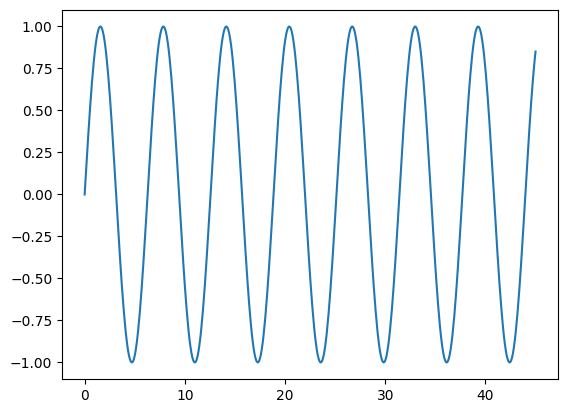

In [9]:
plt.plot(x,y)


In [10]:
# Load the data into a pandas dataframe
# --) Index: x; Data: y; coLumn Label: sine
df = pd. DataFrame(data=y, index=x, columns=['Sine'])

In [11]:
len(df)

500

Split Data --> Train/ Test

In [12]:
#Set percentage of data used for testing
test_percent = 0.2

In [13]:
#Number of data points reserved for testing the model
# 20% of the original dataset

len (df)*test_percent

100.0

In [14]:
#Need to find the Length (number of data points) of the testing dataset It has been found (above) that around 205 data points are used for testing

test_length = np. round (len(df)*test_percent)

In [15]:
test_length

100.0

In [16]:
#The testing data set starts at this index
# Index starting with o
test_start_index = int(len(df) - test_length)

In [17]:
test_start_index

400

In [18]:
#Create separate training / testing datasets
# Training dataset: AlL the indices from start to test_ start_index
# (excluding test_ start_index)
data_train = df. iloc[: test_start_index]
# Testing dataset: ALL the indices from test_start_index to the end of the dataframe
# (including test_start_index)
data_test = df. iloc[test_start_index :]

In [19]:
data_train.head(5)

,Sine
0.000000,0.000000
0.090180,0.090058
0.180361,0.179384
0.270541,0.267253
0.360721,0.352949


In [20]:
data_test.head(5)

,Sine
36.072144,-0.998423
36.162325,-0.999422
36.252505,-0.992298
36.342685,-0.977111
36.432866,-0.953982


In [21]:
# Create a MinMaxScaler to normalize the data
scaler = MinMaxScaler ()

In [22]:
# IGNORE the warning: Just converting the data to floats
# ONLY scale the TRAINING dat - NOT scale testing data lo
# Train the scaler to perform the normalization
scaler. fit(data_train)

MinMaxScaler()

In [23]:
# Normalize the training dataset
normalized_train = scaler. transform (data_train)
# Normalize the testing dataset
normalized_test = scaler. transform (data_test)

#Create TimeseriesGenerator instance

In [24]:
# TimeseriesGenerator: Generate time series batches for training/testing
# Set the Length of the input sequence
# i.e., the number of time series steps that are used to predict the future one
# Use 50 historical data points to predict the next one
length = 50
#batch_size: Number of time series samples in each batch
# One sample: each sample is a time series input sequence
# Only one sample in each batch
batch_size = 1
# Create a TimeSeriesGenerator for training: train_tsGenerator
# --) This time series generator produces time series batches used to train the model
# TimeseriesGenerator(inputs dataset, outputs dataset, Length, batch_size)
train_tsGenerator50 = TimeseriesGenerator(normalized_train, normalized_train, length=length, batch_size=batch_size)

In [25]:
len (normalized_train)

400

In [26]:
#What does the first batch look Like?
x, y = train_tsGenerator50[0]

In [27]:
# Print X. flatten()
x. flatten ()

array([0.50000598, 0.54503608, 0.58970022, 0.63363541, 0.6764846 ,
       0.71789955, 0.75754369, 0.79509481, 0.83024776, 0.86271683,
       0.89223816, 0.91857182, 0.9415038 , 0.96084773, 0.97644641,
       0.98817306, 0.99593239, 0.99966132, 0.99932957, 0.99493982,
       0.98652775, 0.97416172, 0.95794223, 0.9380011 , 0.91450039,
       0.88763109, 0.85761157, 0.82468578, 0.78912133, 0.75120725,
       0.71125165, 0.66957926, 0.62652876, 0.58245   , 0.53770122,
       0.4926461 , 0.44765078, 0.40308096, 0.35929885, 0.31666026,
       0.27551172, 0.23618764, 0.19900761, 0.16427379, 0.13226846,
       0.10325173, 0.07745941, 0.05510113, 0.03635858, 0.02138409])

In [28]:
#Print y: What does x predict ?
y

array([[0.01029936]])

Build Simple RNN Model

In [29]:
#Data set: Only one column/attribute: Sine values of index x
# Features: How many fentures used to train the model: Only one
n_features = 1

# define model
model = Sequential()

# Add a simple RNN Layer: Using SimpLeRNN cells
# This Layer has 64 neurons
#Input Shape 2D: # time series steps x #features
model.add(SimpleRNN(64, input_shape=(length, n_features)))

# Add a FC (fully-connected) Layer for the final prediction
# Only one neuro of the Dense/Fully-Connected Layer
# -→> Output: Predict the next data point of the input sequence: only one value
model.add (Dense (1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compile model

In [30]:
# Compile the model
# Loss function: mse (Mean Squared Errors)
# NOTES: Why MSE? The data is real values/continuous: A regression problem
# Optimizer: Adam
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 64)                  │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

Train (Fit) Model

In [31]:
# Fit the model
# Use fit() instead of fit_generator()
model.fit(train_tsGenerator50, epochs=5)

Epoch 1/5
 21/350 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.2582

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


350/350 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0520
Epoch 2/5
350/350 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 1.2679e-04
Epoch 3/5
350/350 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 1.5769e-04
Epoch 4/5
350/350 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 2.2423e-04
Epoch 5/5
350/350 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.4261e-04


In [32]:
# Compile the model
model.compile(optimizer='adam', loss='mse') # This line is essential
model.summary()

# Fit the model
model.fit(train_tsGenerator50, epochs=5)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 64)                  │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
350/350 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0032
Epoch 2/5
350/350 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 3.1526e-04
Epoch 3/5
350/350 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 1.6218e-04
Epoch 4/5
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 2.3657e-04
Epoch 5/5
350/350 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 6.2822e-05


Visualize Model's Performance after Training

<Axes: >

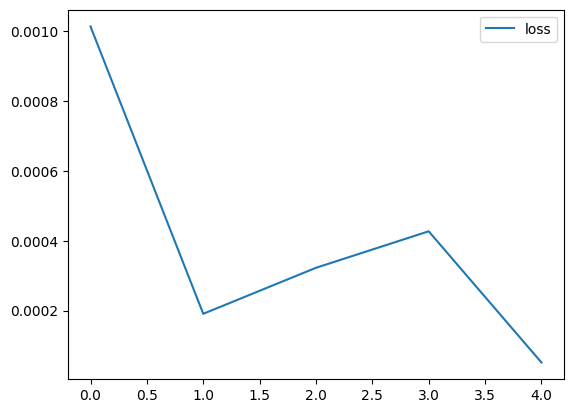

In [33]:
# Load the Loss data (model.history.history) into a data frame
df_model_loss = pd. DataFrame (model. history.history)
# Visualize the loss data using DataFrame. plot)
df_model_loss. plot()

#Evaluate Model on Test Data

A sneak peek into the test data

In [34]:
# Number of time steps of the input time series
length

50

In [35]:
# Take a sneak peek into the 1st time series batch (50 data points)
# array[-Length:]: A sequence of [50th to the Last .. Last]
first_eval_batch = normalized_train[-length : ]
first_eval_batch

array([[0.57334198],
       [0.61758711],
       [0.66087665],
       [0.70285881],
       [0.74319238],
       [0.78154958],
       [0.81761867],
       [0.85110653],
       [0.88174101],
       [0.90927312],
       [0.93347913],
       [0.95416231],
       [0.97115456],
       [0.9843178 ],
       [0.99354504],
       [0.99876129],
       [0.99992417],
       [0.99702421],
       [0.990085  ],
       [0.97916292],
       [0.96434673],
       [0.94575686],
       [0.92354437],
       [0.8978898 ],
       [0.86900162],
       [0.83711463],
       [0.80248795],
       [0.76540301],
       [0.72616119],
       [0.68508141],
       [0.64249752],
       [0.59875561],
       [0.55421116],
       [0.50922618],
       [0.46416627],
       [0.41939764],
       [0.3752841 ],
       [0.33218418],
       [0.29044814],
       [0.25041518],
       [0.21241064],
       [0.17674338],
       [0.14370327],
       [0.11355883],
       [0.08655504],
       [0.06291137],
       [0.04281995],
       [0.026

#IMPORTANT NOTES:
-first_eval_batch: [Currently]is a 2D array 50 x 1 (50 rows, 1 column)

-It is necessary to reshape it into a 3D array: 1 × 50 x 1

-(1 plane, 50 row, 1 column)

In [36]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

first_eval_batch

array([[[0.57334198],
        [0.61758711],
        [0.66087665],
        [0.70285881],
        [0.74319238],
        [0.78154958],
        [0.81761867],
        [0.85110653],
        [0.88174101],
        [0.90927312],
        [0.93347913],
        [0.95416231],
        [0.97115456],
        [0.9843178 ],
        [0.99354504],
        [0.99876129],
        [0.99992417],
        [0.99702421],
        [0.990085  ],
        [0.97916292],
        [0.96434673],
        [0.94575686],
        [0.92354437],
        [0.8978898 ],
        [0.86900162],
        [0.83711463],
        [0.80248795],
        [0.76540301],
        [0.72616119],
        [0.68508141],
        [0.64249752],
        [0.59875561],
        [0.55421116],
        [0.50922618],
        [0.46416627],
        [0.41939764],
        [0.3752841 ],
        [0.33218418],
        [0.29044814],
        [0.25041518],
        [0.21241064],
        [0.17674338],
        [0.14370327],
        [0.11355883],
        [0.08655504],
        [0

In [37]:
first_eval_batch.shape

(1, 50, 1)

Evaluate Model

In [38]:
# ALL the code for evaluation
# Declare a List to store all the predictions
# Similar to: test_predictions = List();
test_predictions = []

# Get the first time series batch for testing
# The 1st batch: The 1st time series input sequence
#= the Last 50 data points of the train data set
first_eval_batch = normalized_train[-length:]

# Reshape the batch into 3D array: #samples/batch x Length x #features
current_batch = first_eval_batch. reshape((1, length, n_features))

# Run a FOR Loop to make a prediction for each batch
for i in range (len (data_test)) :

      # Get the value of the first element: The prediction
      current_pred = model. predict (current_batch) [0]

      # store prediction into the list of predictions
      test_predictions. append (current_pred)

      # Generate a new batch to prepare for the next iteration of testing
      # --) Drop the first data point of the current input sequence
      # --) Append the newly-predicted value to the tail of the input sequence
      # --) Maintain the number of time series steps: 50
      current_batch = np. append (current_batch[:,1:, :],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━

In [39]:
# Convert the scaled result back to the real values
true_predictions = scaler. inverse_transform(test_predictions)
true_predictions

array([[-9.97928756e-01],
       [-1.00010531e+00],
       [-9.93587575e-01],
       [-9.80022536e-01],
       [-9.59171486e-01],
       [-9.31408049e-01],
       [-8.96956397e-01],
       [-8.56191466e-01],
       [-8.09853469e-01],
       [-7.57405567e-01],
       [-7.00076585e-01],
       [-6.37627516e-01],
       [-5.70721966e-01],
       [-4.99438584e-01],
       [-4.24122828e-01],
       [-3.45416062e-01],
       [-2.62879127e-01],
       [-1.77756184e-01],
       [-8.99122304e-02],
       [-1.78673060e-04],
       [ 9.12092338e-02],
       [ 1.82934913e-01],
       [ 2.74851322e-01],
       [ 3.65697256e-01],
       [ 4.54420954e-01],
       [ 5.40233389e-01],
       [ 6.21714451e-01],
       [ 6.98361565e-01],
       [ 7.68334897e-01],
       [ 8.31733745e-01],
       [ 8.87012715e-01],
       [ 9.34040203e-01],
       [ 9.72274058e-01],
       [ 1.00141209e+00],
       [ 1.02164431e+00],
       [ 1.03258057e+00],
       [ 1.03498187e+00],
       [ 1.02858691e+00],
       [ 1.0

In [40]:
data_test

,Sine
36.072144,-0.998423
36.162325,-0.999422
36.252505,-0.992298
36.342685,-0.977111
36.432866,-0.953982
...,...
44.639279,0.610729
44.729459,0.679559
44.819639,0.742866
44.909820,0.800136


In [41]:
# NOTES: A warning will be displyed. IT IS OK.
# Copy the true values of predictions into the data frame of original test data
# Add it as another column
data_test['Predictions'] = true_predictions

<ipython-input-41-67193316c104>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['Predictions'] = true_predictions


In [42]:
#Updated data_test
data_test

,Sine,Predictions
36.072144,-0.998423,-0.997929
36.162325,-0.999422,-1.000105
36.252505,-0.992298,-0.993588
36.342685,-0.977111,-0.980023
36.432866,-0.953982,-0.959171
...,...,...
44.639279,0.610729,0.479636
44.729459,0.679559,0.559407
44.819639,0.742866,0.635554
44.909820,0.800136,0.706456


<Axes: >

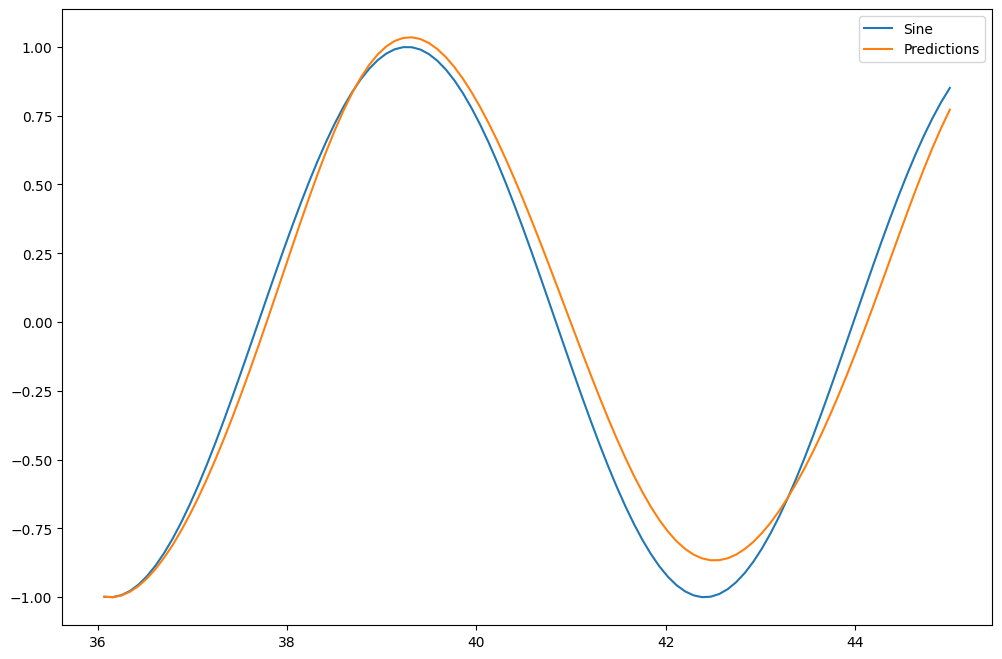

In [43]:
# Visualize the data of the updated test data
# Compare the predicted sine wave against the original sine wave
data_test. plot(figsize= (12,8))